In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from IPython.display import Image

## Tensorflow를 이용한 딥러닝 기초

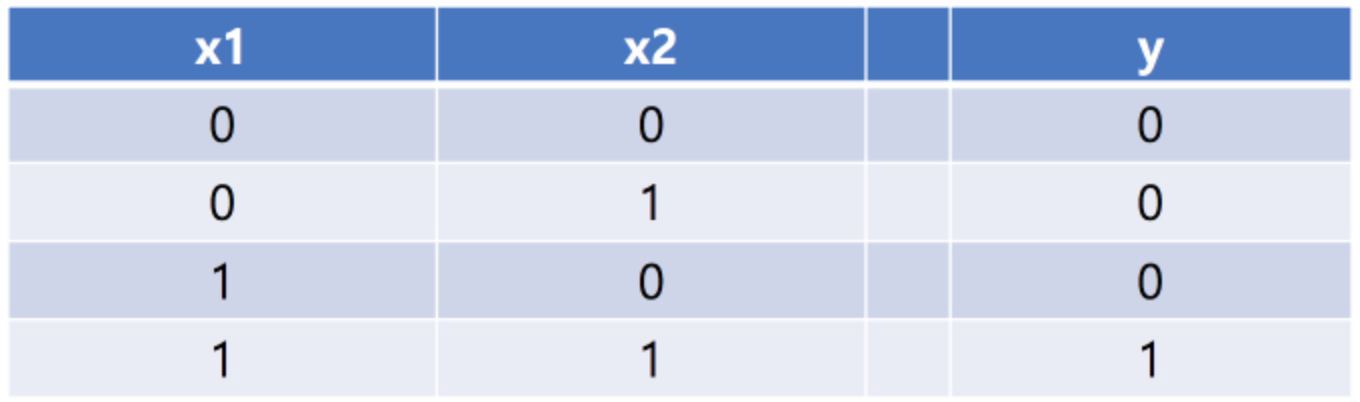

In [34]:
Image('./XAND.png')

AND 연산 학습

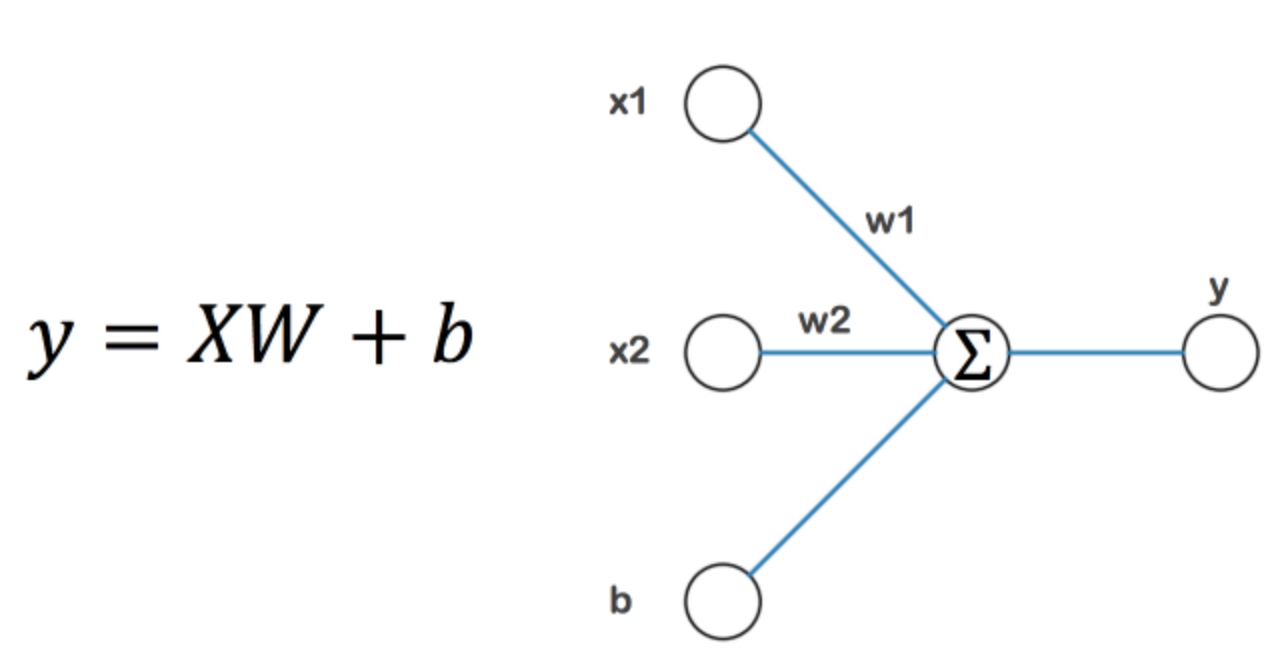

In [12]:
Image ('./tensorflow1.png')

W: 가중치
b: 바이어스 찾기

In [13]:
x_data = np.array ([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]], dtype = np.float32)
y_data = np.array ([[0],
                    [0],
                    [0],
                    [1]], dtype = np.float32)

In [14]:
print (x_data)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


In [15]:
print(y_data)

[[0.]
 [0.]
 [0.]
 [1.]]


### X와 Y로 입력과 출력을 선언

In [17]:
X = tf.placeholder (tf.float32, [None, 2], name = 'x-input')
Y = tf.placeholder (tf.float32, [None, 1], name = 'y-input')
                        # placeholder: 텐서의 객체처럼 행동하지만 생성될 때 값을 가지지 않고 출력될 때 값을 가짐 

### 찾아야 하는 가중치(W)와 바이어스(b)를 변수로 선언한다

In [19]:
W = tf.Variable (tf.random_normal ([2, 1], name = 'weight'))  # 입력 X의 변수가 2개 (열)이기때문에 가중치도 2개로
b = tf.Variable (tf.random_normal ([1]), name = 'bias')


### 가설(hypothesis)=loss function : XW + b

In [22]:
hypothesis = tf.sigmoid (tf.matmul (X, W) + b)    

#tensorflow에서 곱셈은 matmul로 계산

### 비선형성 획득: 활성함수

뉴럴네트워크의 개별 뉴런에 들어오는 입력신호의 총합을 출력신호로 변환하는 함수를 활성화함수(activation function)이라고 함. 

활성화 함수의 유무는 초창기 모델인 퍼셉트론(perceptron)과 뉴럴네트워크의 유일한 차이점.

1) 시그모이드: 범위 [0,1]
    
2)하이퍼볼릭탄젠트: 시그모이드 함수의 크기와 위치를 조절한 함수. 범위 [-1, 1]
    
3)ReLU:  f(x) = max (0, x)

출력 y로 넘어가는 단계에서 비선형성을 획득하기위해 activation function을 사용한다

### cost/loss function

In [27]:
cost = -tf.reduce_mean (Y * tf.log(hypothesis) + (1 - Y) * tf.log ( 1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

### accuracy computation

In [30]:
predicted = tf.cast (hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# predicted: hypothesis가 0.5 넘으면 참, 0.5 이하는 거짓. 참은 1로, 거짓은 0으로 float 형으로 cast 
# accuracy: predicted와 Y값이 같은지 참/거짓으로 나온 값을 float로 cast에서 이것의 평균 (참 인것들의 갯수를 2로 나눈 값)

### launch graph

학습시키기

In [33]:
with tf.Session() as sess:    # with구문을 쓰면 구문이 끝나고나면 알아서 종료. 없어도 상관없음
    # session 시작하기 
    # Initialize TensorFlow variables
    sess.run (tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X: x_data, Y: y_data})
   
    # for 문에서 sess.run으로 훈련 실행

        if step % 100 == 0:
            print (step, sess.run (cost, feed_dict = {X: x_data, Y:y_data}), sess.run(W) )
     
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.65954745 [[0.8152768]
 [1.355896 ]]
100 0.3544514 [[0.943231 ]
 [1.2491833]]
200 0.29550844 [[1.3789032]
 [1.5650234]]
300 0.25482023 [[1.7333238]
 [1.8502729]]
400 0.22460255 [[2.0279622]
 [2.1035864]]
500 0.2010589 [[2.2812698]
 [2.3314795]]
600 0.18208668 [[2.5044725]
 [2.5386243]]
700 0.16641492 [[2.7046943]
 [2.7284389]]
800 0.15322159 [[2.8866978]
 [2.903542 ]]
900 0.14194627 [[3.0538266]
 [3.065993 ]]
1000 0.13219114 [[3.208518 ]
 [3.2174525]]
1100 0.12366433 [[3.3526142]
 [3.3592775]]
1200 0.116145685 [[3.4875498]
 [3.4925888]]
1300 0.10946592 [[3.6144662]
 [3.6183255]]
1400 0.10349214 [[3.7342901]
 [3.7372813]]
1500 0.098118335 [[3.8477898]
 [3.8501325]]
1600 0.09325897 [[3.9556062]
 [3.9574592]]
1700 0.088844165 [[4.058281]
 [4.059769]]
1800 0.084815964 [[4.1562924]
 [4.157491 ]]
1900 0.08112649 [[4.250038 ]
 [4.2510114]]
2000 0.07773498 [[4.339873 ]
 [4.3406687]]
2100 0.07460743 [[4.426106 ]
 [4.4267616]]
2200 0.071714334 [[4.5090113]
 [4.5095553]]
2300 0.06903075 [[4.58